In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as T
dataset = MNIST(root = 'data/', download = True)

In [8]:
len(dataset)

60000

In [43]:
test_dataset = MNIST(root = 'data/', train = False, transform=T.ToTensor())

In [10]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F155370CE90>, 5)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

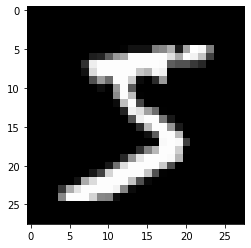

In [12]:
img, _ = dataset[0]
plt.imshow(img, cmap = 'gray')

In [13]:
print(_)

5


In [14]:
import torchvision.transforms as transform

In [15]:
dataset = MNIST(root = 'data/', train = True, transform = transform.ToTensor())

In [16]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [17]:
img, _ = dataset[0]

In [18]:
print(img.shape)

torch.Size([1, 28, 28])


In [19]:
from torch.utils.data import random_split

In [20]:
train_ds, val_ds = random_split(dataset, [50000, 10000])

In [21]:
len(train_ds), len(val_ds)

(50000, 10000)

In [23]:
from torch.utils.data import DataLoader
bs = 128
train_dl = DataLoader(train_ds, bs, shuffle = True)
val_dl = DataLoader(val_ds, bs)

In [24]:
c = 0
for img, lbl in train_dl:
    c += 1

In [25]:
c

391

In [26]:
from torch import nn

In [27]:
input_size = 28 * 28
num_classes = 10

In [28]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()


In [29]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0148, -0.0077, -0.0321,  ...,  0.0283,  0.0253, -0.0235],
         [ 0.0167,  0.0128,  0.0076,  ...,  0.0272, -0.0033,  0.0205],
         [ 0.0181,  0.0330, -0.0341,  ..., -0.0005, -0.0164, -0.0045],
         ...,
         [-0.0150,  0.0090, -0.0295,  ...,  0.0333, -0.0246, -0.0281],
         [-0.0236,  0.0033,  0.0189,  ..., -0.0087,  0.0007, -0.0160],
         [ 0.0068,  0.0078,  0.0121,  ...,  0.0312,  0.0148,  0.0221]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0115,  0.0239,  0.0009,  0.0079, -0.0185, -0.0204,  0.0004, -0.0033,
         -0.0330, -0.0247], requires_grad=True)]

In [30]:
for img, lbl in train_dl:
    outputs = model(img)
    break

In [31]:
import torch.nn.functional as F
probs = F.softmax(outputs, dim = 1)

In [32]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 256)
        self.linear2 = nn.Linear(256, 512)
        self.linear3 = nn.Linear(512, 256)
        self.linear4 = nn.Linear(256, num_classes)
        
        
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear1(xb)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out = self.linear3(out)
        out = F.relu(out)
        out = self.linear4(out)
        return out
    
    def training_step(self, batch):
        img, lbl = batch
        out = self(img)
        loss = F.cross_entropy(out, lbl)
        return loss
    
    def validation_step(self, batch):
        img, lbl = batch
        out = self(img)
        loss = F.cross_entropy(out, lbl)
        acc = accuracy(out, lbl)
        return {'val_loss': loss, 'val_acc' : acc}
    
    def validation_epoch_end(self, outputs):
        batch_loss = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item() }
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
        
model = MnistModel()

In [33]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [34]:
result0 = evaluate(model, val_dl)
print(result0)

{'val_loss': 2.3047266006469727, 'val_acc': 0.08653085678815842}


In [35]:
history1 = fit(5, 0.2, model, train_dl, val_dl)

Epoch [0], val_loss: 0.2784, val_acc: 0.9171
Epoch [1], val_loss: 0.1665, val_acc: 0.9509
Epoch [2], val_loss: 0.1391, val_acc: 0.9569
Epoch [3], val_loss: 0.1137, val_acc: 0.9652
Epoch [4], val_loss: 0.0891, val_acc: 0.9719


In [36]:
history1 += fit(5, 0.1, model, train_dl, val_dl)

Epoch [0], val_loss: 0.0851, val_acc: 0.9745
Epoch [1], val_loss: 0.0800, val_acc: 0.9751
Epoch [2], val_loss: 0.0808, val_acc: 0.9752
Epoch [3], val_loss: 0.0814, val_acc: 0.9761
Epoch [4], val_loss: 0.0796, val_acc: 0.9768


In [37]:
history1 += fit(5, 0.05, model, train_dl, val_dl)

Epoch [0], val_loss: 0.0767, val_acc: 0.9773
Epoch [1], val_loss: 0.0772, val_acc: 0.9772
Epoch [2], val_loss: 0.0774, val_acc: 0.9777
Epoch [3], val_loss: 0.0782, val_acc: 0.9777
Epoch [4], val_loss: 0.0783, val_acc: 0.9777


In [44]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


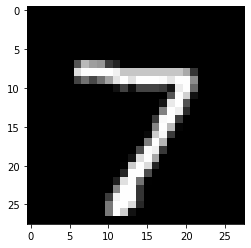

In [45]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))